In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dowload data

In [3]:
# close = pd.Series([...])  # Load close prices here
close = pd.Series([100 + np.sin(i / 10) for i in range(300)])

In [4]:
# EMA parameters
ema_50_value = 50
ema_100_value = 100
ema_200_value = 200

# Calculate EMAs
ema_50 = close.ewm(span=ema_50_value, adjust=False).mean()
ema_100 = close.ewm(span=ema_100_value, adjust=False).mean()
ema_200 = close.ewm(span=ema_200_value, adjust=False).mean()

In [5]:
# Initialize crossover detection list
crossover_signals = []

In [6]:
# Detect crossover events between EMAs
for i in range(1, len(close)):
    signal = None
    # Check for crossovers between EMA50 & EMA100 and EMA100 & EMA200
    if ema_50[i - 1] < ema_100[i - 1] and ema_50[i] >= ema_100[i]:
        signal = "50 crosses above 100"
    elif ema_50[i - 1] > ema_100[i - 1] and ema_50[i] <= ema_100[i]:
        signal = "50 crosses below 100"
    elif ema_100[i - 1] < ema_200[i - 1] and ema_100[i] >= ema_200[i]:
        signal = "100 crosses above 200"
    elif ema_100[i - 1] > ema_200[i - 1] and ema_100[i] <= ema_200[i]:
        signal = "100 crosses below 200"
    
    crossover_signals.append(signal)

In [7]:
# Convert crossover signals to a Series for easier plotting if necessary
crossover_signals = pd.Series(crossover_signals, index=close.index[:-1])

Crossover Alert: 50 crosses below 100 at index 0
Crossover Alert: 100 crosses below 200 at index 1
Crossover Alert: 50 crosses above 100 at index 2
Crossover Alert: 100 crosses above 200 at index 3
Crossover Alert: 50 crosses below 100 at index 4
Crossover Alert: 100 crosses below 200 at index 5
Crossover Alert: 50 crosses above 100 at index 6
Crossover Alert: 100 crosses above 200 at index 7
Crossover Alert: 50 crosses below 100 at index 8
Crossover Alert: 100 crosses below 200 at index 9
Crossover Alert: 50 crosses above 100 at index 10
Crossover Alert: 100 crosses above 200 at index 11
Crossover Alert: 50 crosses below 100 at index 12
Crossover Alert: 100 crosses below 200 at index 13
Crossover Alert: 50 crosses above 100 at index 14
Crossover Alert: 100 crosses above 200 at index 15
Crossover Alert: 50 crosses below 100 at index 16
Crossover Alert: 100 crosses below 200 at index 17


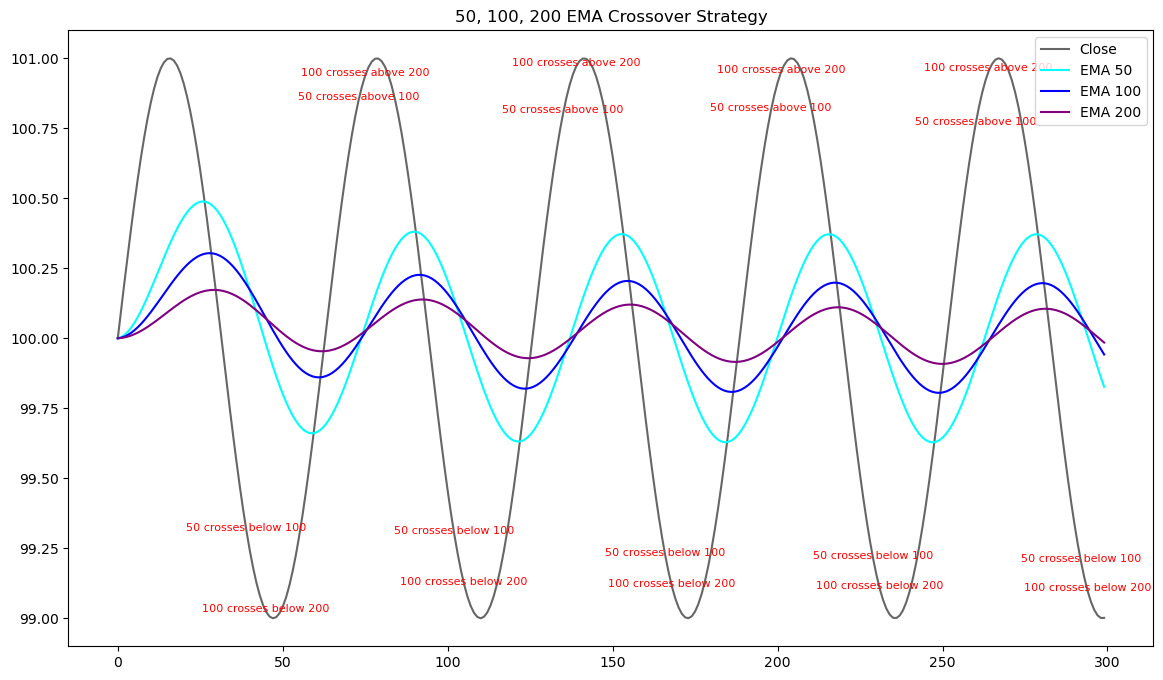

In [8]:
# Plot the close prices and EMAs
plt.figure(figsize=(14, 8))
plt.plot(close, label='Close', color='black', alpha=0.6)
plt.plot(ema_50, label='EMA 50', color='cyan', linewidth=1.5)
plt.plot(ema_100, label='EMA 100', color='blue', linewidth=1.5)
plt.plot(ema_200, label='EMA 200', color='purple', linewidth=1.5)

# Display crossover events on plot
for i, signal in enumerate(crossover_signals):
    if signal is not None:
        plt.annotate(signal, (i, close[i]), color='red', fontsize=8, ha='center')

# Show crossover alerts in the console
for i, signal in enumerate(crossover_signals.dropna()):
    print(f"Crossover Alert: {signal} at index {i}")

plt.legend()
plt.title("50, 100, 200 EMA Crossover Strategy")
plt.show()